### ForSlide
スライド用画像の作成ファイル　  
ファイルを軽くするために，必ずファイルを閉じること

In [19]:
import MDUS
from MDUS import Analysis
from matplotlib import pyplot as plt

(<Figure size 900x300 with 1 Axes>,
 <Axes: title={'center': '2011/06/25 21:44:30 - 2011/06/25 21:55:40'}, xlabel='UTC', ylabel='Magnetic Field [nT]'>)

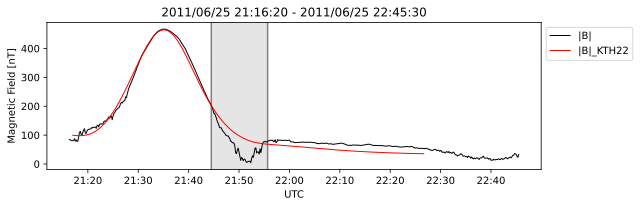

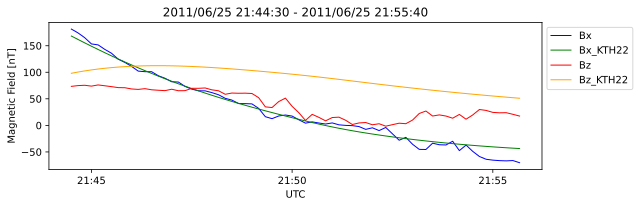

In [26]:
orbit = 199
ds_199 = MDUS.dip.query('orbit == @orbit')['start'].values[0]
de_199 = MDUS.dip.query('orbit == @orbit')['end'].values[0]
data_199 = MDUS.MagData()
data_199.Input(orbit=orbit,sec=10)
data_199.CalcKTH22()
data_199.MLAT()

fig, ax = plt.subplots(figsize=(9,3))  
ax.axvline(ds_199,color='grey')
ax.axvline(de_199,color='grey')
ax.axvspan(ds_199,de_199, color='grey', alpha=0.2)
data_199.Plot(fig=fig,ax=ax,filename='orbit_199_model',component={'|B|':'black','|B|_KTH22':'red'})

data_199.Plot(component={'Bx':'blue','Bx_KTH22':'green','Bz':'red','Bz_KTH22':'orange'},ds=ds_199,de=de_199,filename='199_dip_model')

670 seconds


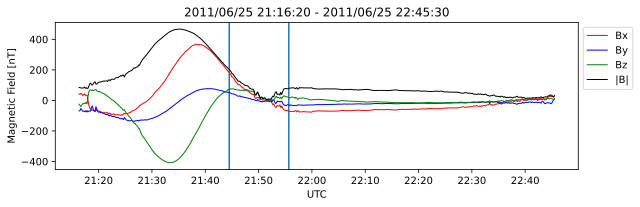

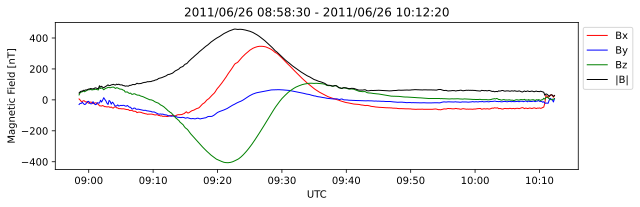

In [18]:
orbit = 199
data_199 = MDUS.MagData()
data_199.Input(orbit=orbit,sec=10)
data_199.MLAT()
ds_199 = data_199.value.query('-20< MLAT < 20').index.values[0]
de_199 = data_199.value.query('-20< MLAT < 20').index.values[-1]

ds_199 = MDUS.dip.query('orbit == @orbit')['start'].values[0]
de_199 = MDUS.dip.query('orbit == @orbit')['end'].values[0]

print((de_199-ds_199).astype('timedelta64[s]'))

fig, ax = plt.subplots(figsize=(9,3))  
ax.axvline(ds_199)
ax.axvline(de_199)
data_199.Plot(fig=fig,ax=ax,filename='orbit_199')
orbit = 200
data_200 = MDUS.MagData()


data_200.Input(orbit=orbit,sec=10)    
data_200.MLAT()
fig, ax = data_200.Plot(filename='orbit_200')
ds_200 = data_200.value.query('-20< MLAT < 20').index.values[0]
de_200 = data_200.value.query('-20< MLAT < 20').index.values[-1]
# ax.axvline(ds_200)
# ax.axvline(de_200)

(<Figure size 600x600 with 1 Axes>,
 <Axes: xlabel='X_MSO [Rm]', ylabel='Z_MSO [Rm]'>)

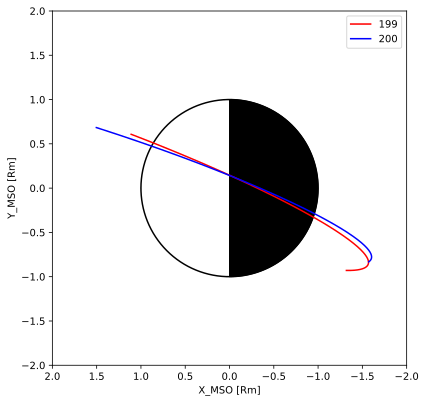

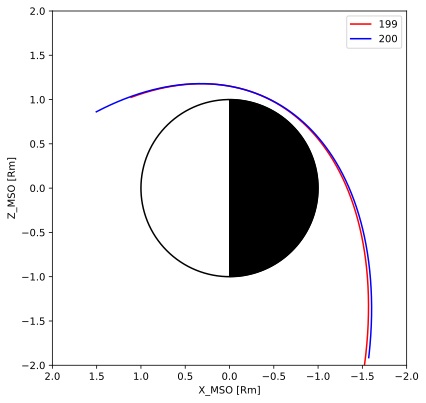

In [23]:
fig, ax = data_199.PlotOrbit(label='199')
data_200.PlotOrbit(label='200',ax=ax,fig=fig,color='blue',filename='orbit_199_200_XY')
fig, ax = data_199.PlotOrbit(label='199',coordinate='XZ')
data_200.PlotOrbit(label='200',ax=ax,fig=fig,color='blue',coordinate='XZ',filename='orbit_199_200_XZ')

In [7]:
tmp = 'XX'
'Y' in tmp

False

In [5]:
import numpy as np